# MOwNiT 
## Laboratorium
## Wybrane zagadnienia algebry liniowej, faktoryzacja
### Algebra liniowa w Julii
https://docs.julialang.org/en/v1.7/stdlib/LinearAlgebra/index.html


In [1]:
using(LinearAlgebra)

In [2]:
methods(factorize)

# 11 methods for generic function "factorize":
[1] factorize(A::StridedMatrix{T}) where T in LinearAlgebra at D:\Program Files\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\dense.jl:1302
[2] factorize(A::Adjoint) in LinearAlgebra at D:\Program Files\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\dense.jl:1376
[3] factorize(A::Transpose) in LinearAlgebra at D:\Program Files\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\dense.jl:1377
[4] factorize(A::LinearAlgebra.AbstractTriangular) in LinearAlgebra at D:\Program Files\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\triangular.jl:2569
[5] factorize(A::Tridiagonal) in LinearAlgebra at D:\Program Files\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\lu.jl:567
[6] factorize(D::Diagonal) in LinearAlgebra at D:\Program Files\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\diagonal.jl:137
[7] factorize(A::Bidiagonal) in LinearAlgebra at D:\Program Files\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\bidiag.jl:845
[8] factorize(S::SymTridiagonal) in LinearAlgebra at D:\Program Files\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\ldlt.jl:170
[9] factorize(A::SparseArrays.AbstractSparseMatrixCSC) in SparseArrays at D:\Program Files\Julia-1.7.2\share\julia\stdlib\v1.7\SparseArrays\src\linalg.jl:1586
[10] factorize(A::Union{Hermitian{ComplexF64, var"#s859"}, Hermitian{Float64, var"#s859"}, Symmetric{Float64, var"#s859"}} where var"#s859"<:SparseArrays.AbstractSparseMatrixCSC) in SparseArrays at D:\Program Files\Julia-1.7.2\share\julia\stdlib\v1.7\SparseArrays\src\linalg.jl:1616
[11] factorize(A::Union{Hermitian{T, S}, Symmetric{T, S}} where {T, S}) in LinearAlgebra at D:\Program Files\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\symmetric.jl:641

In [3]:
#wiersze vs kolumny
x1=[1 2 2]

1×3 Matrix{Int64}:
 1  2  2

In [4]:
y1=[1 ;2 ;3]

3-element Vector{Int64}:
 1
 2
 3

In [5]:
transpose(x1)

3×1 transpose(::Matrix{Int64}) with eltype Int64:
 1
 2
 2

In [6]:
#iloczyn skalarny
dot(x1,y1)

11

 Długość wektora liczymy jako pierwiastek z jego iloczynu skalarnego 
$$ \lVert\mathbf{v}\rVert = \sqrt{\mathbf{v}\cdot \mathbf{v}}=\sqrt{\sum_{i=1}^nv_i^2}$$



#### Przykładowe dane

In [7]:
#losujemy macierz 3x3
A=rand(3,3)

3×3 Matrix{Float64}:
 0.644764  0.200628  0.449901
 0.735265  0.219369  0.415989
 0.831014  0.764632  0.735036

In [8]:
#losujemy wektor x
x=rand(3)

3-element Vector{Float64}:
 0.7827950272306561
 0.7909741701019557
 0.6791981759242411

In [9]:
# wyliczamy b
b=A*x

3-element Vector{Float64}:
 0.9689811667963282
 1.0316157355470958
 1.7545531090068647

### Sposoby rozwiązania Ax=b

In [10]:
#mozemy policzyc odwrotność macierzy i wymnożyć
# uwaga: nieefektywne!
inv(A) * b

3-element Vector{Float64}:
 0.782795027230657
 0.790974170101957
 0.679198175924238

In [11]:
#najlepiej używać zoptymalizowanego operatora "\""
x=A\b

3-element Vector{Float64}:
 0.782795027230657
 0.7909741701019565
 0.6791981759242393

 operator "\\" wybiera odpowiednią faktoryzację:
- https://docs.julialang.org/en/v1.2/stdlib/LinearAlgebra/#LinearAlgebra.factorize
- https://docs.julialang.org/en/v1.2/stdlib/LinearAlgebra/#man-linalg-factorizations-1
 


### Faktoryzacja LU

In [12]:
# W przypadku ogólnej macierzy kwadratowej jest to faktoryzacja LU z pivotem
Af=factorize(A)

LU{Float64, Matrix{Float64}}
L factor:
3×3 Matrix{Float64}:
 1.0       0.0       0.0
 0.88478   1.0       0.0
 0.775875  0.858845  1.0
U factor:
3×3 Matrix{Float64}:
 0.831014   0.764632   0.735036
 0.0       -0.457162  -0.234356
 0.0        0.0        0.0808799

In [13]:
# Macierz L
Af.L

3×3 Matrix{Float64}:
 1.0       0.0       0.0
 0.88478   1.0       0.0
 0.775875  0.858845  1.0

In [14]:
#Macierz U
Af.U

3×3 Matrix{Float64}:
 0.831014   0.764632   0.735036
 0.0       -0.457162  -0.234356
 0.0        0.0        0.0808799

In [15]:
# wektor permulatacji wierszy 
Af.p

3-element Vector{Int64}:
 3
 2
 1

In [16]:
# mozemy zamienic macierz A na postać zfaktoryzowaną
A=factorize(A)

LU{Float64, Matrix{Float64}}
L factor:
3×3 Matrix{Float64}:
 1.0       0.0       0.0
 0.88478   1.0       0.0
 0.775875  0.858845  1.0
U factor:
3×3 Matrix{Float64}:
 0.831014   0.764632   0.735036
 0.0       -0.457162  -0.234356
 0.0        0.0        0.0808799

In [17]:
# i działać na niej operatorem \
# operator ten będzie wykorzytywał raz utworzony wynik faktoryzacji
A\b

3-element Vector{Float64}:
 0.782795027230657
 0.7909741701019565
 0.6791981759242393

In [18]:
# dla różnych prawych stron równania z tą samą macierzą
c=rand(3);
A\c

3-element Vector{Float64}:
  0.7159906809616786
  0.43416043903640616
 -0.02996851609964576

### Faktoryzacja QR


In [19]:
B=rand(10,5)

10×5 Matrix{Float64}:
 0.347431  0.699679   0.694646   0.905711   0.795641
 0.211619  0.161433   0.332771   0.979226   0.698675
 0.61366   0.0423113  0.803518   0.444937   0.0671171
 0.713869  0.121632   0.681909   0.0786542  0.264404
 0.107692  0.0721033  0.302309   0.234305   0.720247
 0.447163  0.558369   0.669513   0.742156   0.184369
 0.51909   0.214182   0.33384    0.395272   0.0778529
 0.253811  0.240339   0.955367   0.277549   0.525526
 0.403251  0.335296   0.0572594  0.695446   0.566889
 0.097222  0.83228    0.224456   0.604388   0.728138

In [20]:
# W przypadku ogólnej macierzy prostokątnej wybierana jest faktoryzacja QR z pivotem
factorize(B)

QRPivoted{Float64, Matrix{Float64}}
Q factor:
10×10 LinearAlgebra.QRPackedQ{Float64, Matrix{Float64}}:
 -0.472697    0.0601229   0.117306     …  -0.32668    -0.236732   -0.581318
 -0.511065   -0.264617   -0.000735856      0.200619   -0.436439    0.217969
 -0.232216    0.393838   -0.375202        -0.267401    0.288811    0.435146
 -0.0410502   0.495076    0.148616         0.0397859  -0.432789    0.0159398
 -0.122286    0.112176    0.601306        -0.542326    0.246617    0.0630631
 -0.387336    0.128315   -0.451719     …  -0.183533    0.179603   -0.0417154
 -0.206295    0.050418   -0.260725         0.134001   -0.14804    -0.098714
 -0.144855    0.603568    0.256604         0.578223    0.218657   -0.112468
 -0.362958   -0.329055    0.104632         0.302854    0.562326   -0.219076
 -0.315434   -0.148298    0.336134         0.0901446  -0.0612103   0.590633
R factor:
5×5 Matrix{Float64}:
 -1.91605  -1.30814  -1.44672   -1.11638    -0.951439
  0.0       1.26891   0.151338   0.0780686   0.66

- $Q$ to macierz  ortogonalna mxm, co oznacza, że  $Q^T*Q=Q*Q^T=I$ czyli $Q^{-1}=Q^T$ (odwracanie takich macierzy jest szybkie i nie generuje dodatkowych błędów !)
- $R$ to macierz postaci $\begin{pmatrix} Rfactor \\ 0 \end{pmatrix} $ , gdzie $Rfactor$ jest macierzą trójkątną górną, a 0 to macierz zer o wymierze nx(m-n)

### Zastosowanie faktoryzacji do metody najmniejszych kwadratów

Jednym z zastosowań faktoryzacji QR jest użycie jej do metody najmniejszych kwadratów.

Przykład:

Obliczmy dopasowanie wielomianu $$f(x)=wsp_2*x^2+wsp_1*x+wsp_0$$ do punktów (1,1) (2,2) (3,4) (4, 4) (5,3) (6,0)

- Budujemy układ równań wg wzoru $$wsp_2x_i^2+wsp_1x_i+wsp_0=y_i$$:
$$wsp_2*1^2+wsp_1*1+wsp_0=1$$
$$wsp_2*2^2+wsp_1*2+wsp_0=2$$
$$wsp_2*3^2+wsp_1*3+wsp_0=4$$
$$wsp_2*4^2+wsp_1*4+wsp_0=4$$
$$wsp_2*5^2+wsp_1*5+wsp_0=3$$
$$wsp_2*6^2+wsp_1*6+wsp_0=0$$

- Układ ten  nie ma dokładnego rozwiązania. Możemy jednak znaleźć najlepsze przybliżenie, czyli takie $wsp_i$, które minimalizują odległość:

$$\sqrt{\sum_{i=1}^{6}{(y_i-f(x_i))^2}}=\lVert y-A*wsp\rVert$$





Jak użyć do tej mimalizacji faktoryzacji QR:

#### 1. Tworzymy macierz A na postawie $(x_i,y_i)$

In [21]:
A=zeros(6,3) 

6×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

 punkty $(x_i,y_i)$


In [22]:
x=[1; 2 ;3 ;4 ;5 ;6]
y=[1; 2; 4; 4; 3; 0]

6-element Vector{Int64}:
 1
 2
 4
 4
 3
 0

In [23]:
A[:,1]=x.^2

6-element Vector{Int64}:
  1
  4
  9
 16
 25
 36

In [24]:
A[:,2]=x

6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6

In [25]:
A[:,3]=ones(6)

6-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [26]:
A

6×3 Matrix{Float64}:
  1.0  1.0  1.0
  4.0  2.0  1.0
  9.0  3.0  1.0
 16.0  4.0  1.0
 25.0  5.0  1.0
 36.0  6.0  1.0

#### 2. Dokonujemy faktoryzacji QR macierzy A 

In [27]:
 AF=factorize(A)

QRPivoted{Float64, Matrix{Float64}}
Q factor:
6×6 LinearAlgebra.QRPackedQ{Float64, Matrix{Float64}}:
 -0.0209657  -0.343313    0.838525   0.112335    -0.0400677  -0.405397
 -0.0838628  -0.521522    0.167705  -0.00636667   0.34634     0.756879
 -0.188691   -0.534625   -0.223607  -0.612934    -0.487947   -0.121617
 -0.335451   -0.382624   -0.33541    0.753648    -0.213523   -0.122449
 -0.524142   -0.0655178  -0.167705  -0.204705     0.705864   -0.390779
 -0.754765    0.416693    0.279508  -0.0419783   -0.310667    0.283364
R factor:
3×3 Matrix{Float64}:
 -47.697  -9.24587  -1.90788
   0.0    -2.34816  -1.43091
   0.0     0.0       0.559017
permutation:
3-element Vector{Int64}:
 1
 2
 3

In [28]:
# można przetestować ortogonalność:
Transpose(AF.Q)*AF.Q

6×6 Matrix{Float64}:
  1.0           0.0           1.66533e-16  …   2.77556e-17  -2.77556e-17
  0.0           1.0           5.55112e-17      8.32667e-17  -9.71445e-17
  1.66533e-16   5.55112e-17   1.0             -6.93889e-17  -2.77556e-17
 -2.08167e-17  -4.85723e-17  -7.97973e-17     -6.59195e-17  -3.1225e-17
  2.77556e-17   8.32667e-17  -6.93889e-17      1.0          -2.77556e-17
 -2.77556e-17  -9.71445e-17  -2.77556e-17  …  -2.77556e-17   1.0

Mamy równanie:
$$A*wsp=y$$
Dla $A=QR$:
$$QR*wsp =y$$
Możemy obydwie strony wymnożyć z lewej przez $Q^T$:
$$R*wsp =Q^T y$$
$$\begin{pmatrix} Rfactor \\ 0 \end{pmatrix} wsp= Q^T y$$

Poszukiwanym rozwiązaniem jest rozwiązanie równania będącego górną niezerową częścią:
$$Rfactor * wsp= Q^T y[1:n]$$
$$wsp=Rfactor \setminus Q^T y[1:n]$$

In [29]:
# implementacja powyższego (uwaga: w tym przykladzie nie jest potrzebna permutacja,
# bo wektor permutacji wynosi[1 2 3])
AF.R\((Transpose(AF.Q)*y)[1:3])

3-element Vector{Float64}:
 -0.5714285714285724
  3.94285714285715
 -2.8000000000000145

Więcej informacji:
- http://www.math.uconn.edu/~leykekhman/courses/MATH3795/Lectures/Lecture_8_Linear_least_squares_orthogonal_matrices.pdf
- http://www.seas.ucla.edu/~vandenbe/133A/lectures/qr.pdf

W praktyce używamy tego algorytmu poprzez operator "\\", za którym jest on "schowany".

In [30]:
A \ y

3-element Vector{Float64}:
 -0.5714285714285723
  3.9428571428571493
 -2.8000000000000136

In [31]:
#sprawdzamy czy dostaliśmy dobre wspólczynniki
using Polynomials
fit(x,y, 2)

Polynomial(-2.8000000000000136 + 3.9428571428571493*x - 0.5714285714285723*x^2)

In [32]:
@which fit

Polynomials

### Zadania

### Zadanie 1 (1pkt)
Ustal losowe (referencyjne) x rozmiaru 1000 oraz losowe A rozmiaru 1000x1000, policz b=A*x.
Nastepnie rozwiąż równanie Ax=b trzema metodami:
- inv()
- \
- factorize()

Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego x) oraz czas wykonania (@time). UWAGA: pierwsze wykonanie funkcji w Julii zawiera czas kompilacji tej funkcji, dlatego czas mierzymy  od drugiego wywołania !

#### Zadanie 2 (1pkt)
Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda z użyciem faktoryzacji QR zaprezentowana na tym laboratorium).
Porównaj wyniki z tymi otrzymanymi poprzednio.

#### Zadanie 3 (2 pkt)

Znajdź i zaprezentuj działanie innego zastosowania wybranej faktoryzacji. Przykładowe (ale nie jedyne!) tematy:

-    tworzenie pseudoinversji macierzy (http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf).

-   uzycie faktoryzacji QR do znajdowania wartości własnych (https://en.wikipedia.org/wiki/QR_algorithm)

-  zastosowanie faktoryzacji SVD - np. zastosowania w uczeniu maszynowym 



# ZAD1(1pkt) 

Ustal losowe (referencyjne) x rozmiaru 1000 oraz losowe A rozmiaru 1000x1000, policz b=A*x. Nastepnie rozwiąż równanie Ax=b trzema metodami:

inv()
\
factorize()
Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego x) oraz czas wykonania (@time). UWAGA: pierwsze wykonanie funkcji w Julii zawiera czas kompilacji tej funkcji, dlatego czas mierzymy od drugiego wywołania !

In [33]:
x = rand(1000);
A = rand(1000,1000);
b = A * x;

In [34]:
function solve_inv(A, b)
    return inv(A) * b
end

function solve_operator(A, b)
    return A \ b
end

solve_operator (generic function with 1 method)

In [35]:
solve_inv(A,b)
solve_operator(A,b)

1000-element Vector{Float64}:
 0.8186213792150963
 0.6716224170674311
 0.10584830858517028
 0.7320702933277615
 0.8072152064698421
 0.3548956482389747
 0.9649633955218874
 0.4424933498227721
 0.8035396795832679
 0.26289505694169235
 0.25284605647726244
 0.16933579879590213
 0.01810944371315147
 ⋮
 0.97830028288313
 0.9587960287340532
 0.9223041366113227
 0.5169383242086297
 0.5928439350246432
 0.6064578810566773
 0.4879921074649657
 0.2422611908104582
 0.6336516493041212
 0.661810962438627
 0.4410900509009028
 0.017257559725778658

In [36]:
@time inv_res = solve_inv(A, b)

  0.070379 seconds (6 allocations: 8.133 MiB)


1000-element Vector{Float64}:
 0.8186213792155002
 0.6716224170670273
 0.10584830858584837
 0.7320702933278014
 0.8072152064698734
 0.35489564823829056
 0.964963395521103
 0.4424933498227688
 0.8035396795851106
 0.26289505694222726
 0.2528460564783046
 0.16933579879660243
 0.018109443713449025
 ⋮
 0.9783002828831684
 0.9587960287346178
 0.9223041366111993
 0.5169383242093488
 0.5928439350259183
 0.6064578810571106
 0.48799210746526356
 0.24226119081153286
 0.6336516493028483
 0.6618109624376451
 0.441090050901078
 0.01725755972522959

In [37]:
@time operator_res = solve_operator(A,b)

  0.024251 seconds (4 allocations: 7.645 MiB)


1000-element Vector{Float64}:
 0.8186213792150963
 0.6716224170674311
 0.10584830858517028
 0.7320702933277615
 0.8072152064698421
 0.3548956482389747
 0.9649633955218874
 0.4424933498227721
 0.8035396795832679
 0.26289505694169235
 0.25284605647726244
 0.16933579879590213
 0.01810944371315147
 ⋮
 0.97830028288313
 0.9587960287340532
 0.9223041366113227
 0.5169383242086297
 0.5928439350246432
 0.6064578810566773
 0.4879921074649657
 0.2422611908104582
 0.6336516493041212
 0.661810962438627
 0.4410900509009028
 0.017257559725778658

In [38]:
A_f = A
@time A_f = factorize(A)

  0.032333 seconds (4 allocations: 7.637 MiB)


LU{Float64, Matrix{Float64}}
L factor:
1000×1000 Matrix{Float64}:
 1.0          0.0         0.0         …   0.0        0.0       0.0
 0.00336504   1.0         0.0             0.0        0.0       0.0
 0.866684    -0.824416    1.0             0.0        0.0       0.0
 0.645611     0.160361    0.684064        0.0        0.0       0.0
 0.197547     0.807324    0.247245        0.0        0.0       0.0
 0.716797     0.18201     0.650779    …   0.0        0.0       0.0
 0.738528     0.202128   -0.0376808       0.0        0.0       0.0
 0.0896472    0.173607    0.687417        0.0        0.0       0.0
 0.794197    -0.480492    0.67219         0.0        0.0       0.0
 0.490141     0.319077    0.43186         0.0        0.0       0.0
 0.0109004    0.0625027   0.733817    …   0.0        0.0       0.0
 0.659455    -0.470858    0.828013        0.0        0.0       0.0
 0.027066     0.179488    0.330555        0.0        0.0       0.0
 ⋮                                    ⋱                        

In [39]:
@time factorization_operator_res = solve_operator(A,b)

  0.061252 seconds (4 allocations: 7.645 MiB)


1000-element Vector{Float64}:
 0.8186213792150963
 0.6716224170674311
 0.10584830858517028
 0.7320702933277615
 0.8072152064698421
 0.3548956482389747
 0.9649633955218874
 0.4424933498227721
 0.8035396795832679
 0.26289505694169235
 0.25284605647726244
 0.16933579879590213
 0.01810944371315147
 ⋮
 0.97830028288313
 0.9587960287340532
 0.9223041366113227
 0.5169383242086297
 0.5928439350246432
 0.6064578810566773
 0.4879921074649657
 0.2422611908104582
 0.6336516493041212
 0.661810962438627
 0.4410900509009028
 0.017257559725778658

First method is definietly the slowest one. The fastest one is the last method. The reason for that is the fact, that it uses A_f - previously factorized A matrix

Comparing results with real values:

In [40]:
inv_diff = x - inv_res
dot(inv_diff, inv_diff)

5.274093630297066e-22

In [41]:
operator_diff = x - operator_res
dot(operator_diff, operator_diff)

2.857747549354203e-22

In [42]:
factorization_operator_diff = x - factorization_operator_res
dot(factorization_operator_diff, factorization_operator_diff)

2.857747549354203e-22

# ZAD2(1pkt)

Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda z użyciem faktoryzacji QR zaprezentowana na tym laboratorium). Porównaj wyniki z tymi otrzymanymi poprzednio.

In [43]:
using CSV
using DataFrames
using Plots

In [45]:
df = CSV.read("mm_data_julia.csv", delim=",",DataFrame);

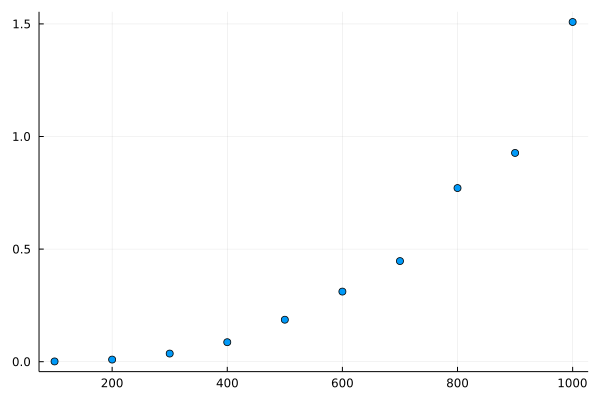

In [46]:
x_julia = df[df[:,2] .== "n", 1]
# y_julia_n = df[df[:,2] .== "n", 3]
y_julia_i = df[df[:,2] .== "i", 3]
# y_julia_b = df[df[:,2] .== "b", 3];

fit_poly_julia_i = fit(x_julia, y_julia_i, 3)
scatter(x_julia,y_julia_i, label ="")

In [47]:
A_aprox = zeros(10, 4)
A_aprox[:,1]=x_julia.^3;
A_aprox[:,2]=x_julia.^2;
A_aprox[:,3]=x_julia.^1;
A_aprox[:,4]=ones(10);

A_aprox_F = factorize(A_aprox);

aprox_res_QR = A_aprox_F \ y_julia_i

poly_aprox = Polynomial( reverse(aprox_res_QR))

fit_aprox = fit(x_julia, y_julia_i, 3)

Polynomial(-0.05726801610333451 + 0.0005695198150021444*x - 1.3938817774300841e-6*x^2 + 2.344394140637148e-9*x^3)

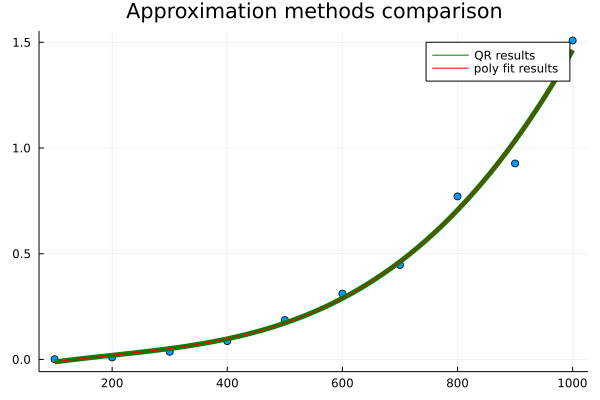

In [50]:
scatter(x_julia, y_julia_i, label ="")
plot!(poly_aprox,  
    extrema(x_julia)..., 
    label = "QR results",
    color = :green,
    linewidth = 5,
    title = "Approximation methods comparison"
)
plot!(fit_aprox,  
    extrema(x_julia)..., 
    label = "poly fit results",
    color = :red
)

# ZAD3(2pkt)

Znajdź i zaprezentuj działanie innego zastosowania wybranej faktoryzacji. Przykładowe (ale nie jedyne!) tematy:

tworzenie pseudoinversji macierzy (http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf).

uzycie faktoryzacji QR do znajdowania wartości własnych (https://en.wikipedia.org/wiki/QR_algorithm)

zastosowanie faktoryzacji SVD - np. zastosowania w uczeniu maszynowym